In [2]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_wind.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime 

In [3]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_wind.csv')

In [4]:
wind = wind.set_index('datetime')

In [5]:
wind.index = pd.to_datetime(wind.index)

wind.index

DatetimeIndex(['2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               ...
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=467208, freq=None)

In [6]:
wind.head()
len(wind)

467208

In [7]:
solar = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\pepco_df_solar.csv')

In [8]:
solar = solar.set_index('datetime')
solar.index = pd.to_datetime(solar.index)

solar.index

DatetimeIndex(['2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               '2020-07-01 00:00:00', '2020-07-01 00:00:00',
               ...
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00',
               '2020-09-30 00:00:00', '2020-09-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=467208, freq=None)

In [9]:
len(solar)

467208

## Need to think about

- what to do with voltage
    - rename to 'voltage (kv) and values switched to floats
    

In [ ]:
#solar['voltage'] = solar['voltage'].str.replace(r'[^0-9]+', '')

In [ ]:
#solar.astype({'voltage': 'float64'}).dtypes

In [ ]:
#solar = solar.rename(columns={"voltage":'voltage_kv'})

In [ ]:
solar.head(45)
# Wayne: I believe that columns like 'solar_generation_mw' & 'mw' will be the same 
#for any instance of a datetime signature 
#is there a better way to handle these, perhaps a separate df
#please let me know your thoughts on this 

In [ ]:
#wind['voltage_kv'] = wind['voltage_kv'].str.replace(r'[^0-9]+', '')
#wind.astype({'voltage_kv': 'float64'}).dtypes
#wind = wind.rename(columns={"voltage":'voltage_kv'})
#wind.drop(['zone'], axis=1)

#solar['voltage_kv'] = solar['voltage_kv'].str.replace(r'[^0-9]+', '')
#solar.astype({'voltage': 'float64'}).dtypes
#solar = solar.rename(columns={"voltage":'voltage_kv'})
#solar.drop(['zone'], axis=1)

In [10]:
wind['voltage'] = wind['voltage'].str.replace(r'[^0-9]+', '')
wind.astype({'voltage': 'float64'}).dtypes
wind = wind.rename(columns={"voltage":'voltage_kv'})
wind = wind.drop(['area', 'zone'], axis=1)

solar['voltage'] = solar['voltage'].str.replace(r'[^0-9]+', '')
solar.astype({'voltage': 'float64'}).dtypes
solar = solar.rename(columns={"voltage":'voltage_kv'})
solar = solar.drop(['area', 'zone'], axis=1)

In [ ]:
#wind = wind.drop(['area', 'zone'], axis=1)
#solar = solar.drop(['area', 'zone'], axis=1)

## Exploring the Data

In [ ]:
solar.head()

In [12]:
solar['voltage_kv'].value_counts(normalize=True) * 100

69     39.351852
13     20.370370
138    19.444444
34      7.407407
18      4.166667
230     2.777778
500     1.851852
23      0.925926
4       0.925926
24      0.925926
20      0.925926
19      0.462963
345     0.462963
Name: voltage_kv, dtype: float64

In [13]:
wind['voltage_kv'].value_counts(normalize=True) * 100

69     39.351852
13     20.370370
138    19.444444
34      7.407407
18      4.166667
230     2.777778
500     1.851852
23      0.925926
4       0.925926
24      0.925926
20      0.925926
19      0.462963
345     0.462963
Name: voltage_kv, dtype: float64

In [14]:
wind['equipment'].value_counts(normalize=True) * 100
#Wayne: i figure i'm not getting an innacurate percentage becuase in theory each 
#piece of eqipment 

LOAD T3     3.773585
LOAD T4     3.773585
LOAD T1     3.773585
LOAD T2     3.773585
LD3         3.301887
              ...   
LD12        0.471698
LD4B        0.471698
STCHA1CT    0.471698
LOAD48      0.471698
69-1        0.471698
Name: equipment, Length: 138, dtype: float64

In [15]:
solar['equipment'].value_counts(normalize=True) * 100
#there are lots of different equipments here, how to determine approach in feature engineering?

LOAD T3     3.773585
LOAD T4     3.773585
LOAD T1     3.773585
LOAD T2     3.773585
LD3         3.301887
              ...   
LD12        0.471698
LD4B        0.471698
STCHA1CT    0.471698
LOAD48      0.471698
69-1        0.471698
Name: equipment, Length: 138, dtype: float64

In [16]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import random 

## Subset all floats into a dataframe

In [17]:
solar_std = solar[['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']] #need double brackets bc otherwise python reads as one column, need list of columns
solar_columns = ['system_energy_price_rt', 'total_lmp_rt', 'congestion_price_rt', 'marginal_loss_price_rt', 'solar_generation_mw',
'mw','fuel_percentage_of_total']

In [18]:

solar_std = solar_std.apply(pd.to_numeric)

In [29]:
print(solar_std['total_lmp_rt'].std(ddof=0))
print(solar_std['total_lmp_rt'].mean())

17.976688410698962
24.585854052156204


In [39]:
print(solar.groupby('voltage_kv')['total_lmp_rt'].std(ddof=0).sort_values(ascending=True)) #why isn't ascending?
print(solar.groupby('voltage_kv')['total_lmp_rt'].mean().sort_values(ascending=True))

voltage_kv
500    15.578337
19     15.657216
138    17.056026
34     17.069822
18     17.238511
69     18.110163
13     18.429624
230    18.660552
345    18.808535
23     19.462245
4      19.781775
20     23.550356
24     23.557447
Name: total_lmp_rt, dtype: float64
voltage_kv
19     23.710656
500    23.732982
18     24.120499
4      24.263606
23     24.508791
345    24.541572
13     24.558139
69     24.616284
138    24.685597
34     24.686763
230    24.723689
20     24.907982
24     24.923710
Name: total_lmp_rt, dtype: float64


In [45]:
print(solar_std['marginal_loss_price_rt'].std(ddof=0))
print(solar_std['marginal_loss_price_rt'].mean())

0.4373033430097594
0.1657579921576687


In [40]:
print(solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0).sort_values())
print(solar.groupby('voltage_kv')['marginal_loss_price_rt'].mean().sort_values())

voltage_kv
500    0.287343
4      0.295017
24     0.331112
20     0.331739
19     0.336661
18     0.360278
345    0.364353
69     0.385254
230    0.401535
13     0.419866
23     0.445067
138    0.448208
34     0.449709
Name: marginal_loss_price_rt, dtype: float64
voltage_kv
19    -0.241859
23    -0.199196
18    -0.192534
20    -0.112744
345   -0.104424
24    -0.097016
500   -0.091585
4     -0.001493
13     0.065928
230    0.077678
69     0.157718
138    0.382820
34     0.388667
Name: marginal_loss_price_rt, dtype: float64


In [41]:

(solar.groupby('voltage_kv')['marginal_loss_price_rt'].std(ddof=0)) - solar_std['marginal_loss_price_rt'].std(ddof=0)

voltage_kv
13    -0.017437
138    0.010905
18    -0.077025
19    -0.100642
20    -0.105565
23     0.007764
230   -0.035769
24    -0.106191
34     0.012406
345   -0.072950
4     -0.142286
500   -0.149960
69    -0.052049
Name: marginal_loss_price_rt, dtype: float64

In [42]:
marg_loss = solar['marginal_loss_price_rt']

In [44]:
marg_loss.describe() 

count    467208.000000
mean          0.165758
std           0.437304
min          -3.810000
25%          -0.050000
50%           0.130000
75%           0.330000
max           4.590000
Name: marginal_loss_price_rt, dtype: float64

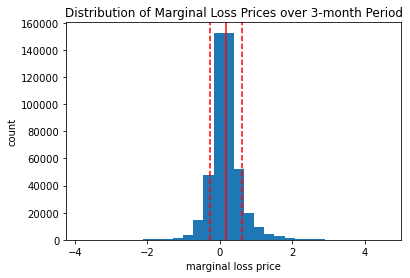

In [46]:
_ = plt.hist(marg_loss, bins=30)
_ = plt.xlabel('marginal loss price')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Marginal Loss Prices over 3-month Period')
_ = plt.axvline(0.165758, color='r')
_ = plt.axvline(0.165758+ 0.437304, color='r', linestyle='--')
_ = plt.axvline(0.165758- 0.437304, color='r', linestyle='--')


In [ ]:
_ = plt.hist(marg_loss, bins=30)
_ = plt.xlabel('lmp')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Marginal Loss Prices over 3-month Period')
_ = plt.axvline(0.165758, color='r')
_ = plt.axvline(0.165758+ 0.437304, color='r', linestyle='--')
_ = plt.axvline(0.165758- 0.437304, color='r', linestyle='--')

17.976688410698962
24.585854052156204

The marginal loss price for the Pepco energy grid is normally distributed. There appears to be minimal outliers, but is ever so slighlty skewed left. 

In [60]:
def marg_loss_sampler(n):
    return np.random.choice(marg_loss, n)


In [61]:
fifty_samples = marg_loss_sampler(50)
fifty_samples.mean()

0.11520000000000001

In [62]:
five100_samples = marg_loss_sampler(500)
five100_samples.mean()

0.1627

In [63]:
five1000 = marg_loss_sampler(5000)
five1000.mean()

0.16507000000000002

In [64]:
marg_loss_mean = np.mean(marg_loss)
marg_loss_std = np.std(marg_loss, ddof=0)
ppf = norm.ppf([0.975, 0.025], loc=marg_loss_mean, scale=marg_loss_std)
print(ppf)

[ 1.02285679 -0.69134081]


The point percentage function in conjunction with the above histogram shows that the marinal loss price is heavily cenetred around it's mean. 


1510.3297734620546
1216.3855141028212


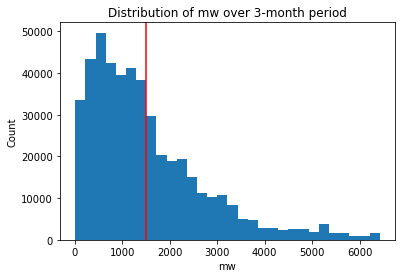

In [66]:
w_mean = np.mean(wind.mw)
w_std = np.std(wind.mw, ddof=0)
print(w_mean)
print(w_std)


_ = plt.hist(wind['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of wind-mw over 3-month period')
_ = plt.axvline(w_mean, color='r')

471.83388811925397
563.8557892168087


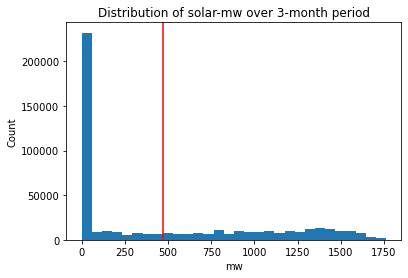

In [67]:
s_mean = np.mean(solar.mw)
s_std = np.std(solar.mw, ddof=0)
print(s_mean)
print(s_std)


_ = plt.hist(solar['mw'], bins=30)
_ = plt.xlabel('mw')
_ = plt.ylabel('Count')
_ = plt.title('Distribution of solar-mw over 3-month period')
_ = plt.axvline(s_mean, color='r')

In [68]:
solar_mw = solar['mw']
solar_mw.describe()

count    467208.000000
mean        471.833888
std         563.856393
min           0.000000
25%          10.600000
50%          66.000000
75%         979.000000
max        1761.100000
Name: mw, dtype: float64

Wind clearly has more variability in how much mw is produced/availableover th three month period. Wonder how this stark discrepancy infuences lmps?

## Correlation Heat Maps

In [71]:
solar.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,3.729405e-18,-1.650763e-17,9.525335e-17,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,3.647415e-01,3.985117e-01,2.980978e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,3.087442e-01,3.340170e-01,2.638913e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,6.315318e-02,6.253249e-02,7.245064e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,7.126924e-02,9.331164e-02,4.487364e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,-6.672614e-03,1.946622e-02,1.345957e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,6.672614e-03,-1.946622e-02,-1.345957e-02,NaN
solar_generation_mw,3.729405e-18,3.647415e-01,0.308744,0.063153,0.071269,-6.672614e-03,6.672614e-03,1.000000e+00,9.694056e-01,8.889572e-01,NaN
mw,-1.650763e-17,3.985117e-01,0.334017,0.062532,0.093312,1.946622e-02,-1.946622e-02,9.694056e-01,1.000000e+00,9.113926e-01,NaN
fuel_percentage_of_total,9.525335e-17,2.980978e-01,0.263891,0.072451,0.044874,1.345957e-02,-1.345957e-02,8.889572e-01,9.113926e-01,1.000000e+00,NaN


In [72]:
wind.corr()

,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,wind_generation_mw,mw,fuel_percentage_of_total,is_renewable
pnode_id,1.000000e+00,-4.467325e-19,-0.004252,0.000371,-0.183638,5.477379e-17,-4.387186e-17,-7.048910e-19,-2.132014e-18,3.672529e-18,NaN
system_energy_price_rt,-4.467325e-19,1.000000e+00,0.821285,0.125278,0.281539,-2.197929e-02,2.200903e-02,-1.423463e-01,-1.957856e-01,-2.973055e-01,NaN
total_lmp_rt,-4.251840e-03,8.212854e-01,1.000000,0.668454,0.351933,-1.702761e-02,1.705050e-02,-1.253684e-01,-1.630409e-01,-2.437623e-01,NaN
congestion_price_rt,3.708350e-04,1.252783e-01,0.668454,1.000000,0.207669,1.223763e-03,-1.223763e-03,-3.248622e-02,-3.108638e-02,-3.801099e-02,NaN
marginal_loss_price_rt,-1.836381e-01,2.815394e-01,0.351933,0.207669,1.000000,-5.723529e-02,5.726566e-02,-4.441509e-02,6.422924e-03,-4.877456e-02,NaN
row_is_current,5.477379e-17,-2.197929e-02,-0.017028,0.001224,-0.057235,1.000000e+00,1.122020e-02,1.492743e-03,3.239424e-02,4.574003e-02,NaN
version_nbr,-4.387186e-17,2.200903e-02,0.017051,-0.001224,0.057266,1.122020e-02,1.000000e+00,-1.492743e-03,-3.239424e-02,-4.574003e-02,NaN
wind_generation_mw,-7.048910e-19,-1.423463e-01,-0.125368,-0.032486,-0.044415,1.492743e-03,-1.492743e-03,1.000000e+00,4.195998e-01,3.822935e-01,NaN
mw,-2.132014e-18,-1.957856e-01,-0.163041,-0.031086,0.006423,3.239424e-02,-3.239424e-02,4.195998e-01,1.000000e+00,9.408888e-01,NaN
fuel_percentage_of_total,3.672529e-18,-2.973055e-01,-0.243762,-0.038011,-0.048775,4.574003e-02,-4.574003e-02,3.822935e-01,9.408888e-01,1.000000e+00,NaN


<AxesSubplot:>

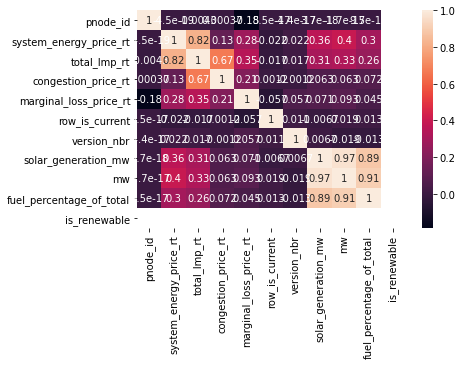

In [73]:
sns.heatmap(solar.corr(), annot=True )

<AxesSubplot:>

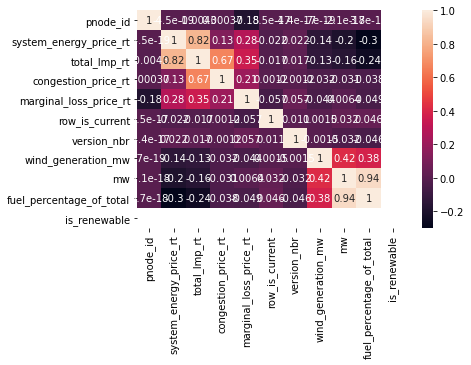

In [74]:
sns.heatmap(wind.corr(), annot=True)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='voltage_kv', ylabel='marginal_loss_price_rt'>

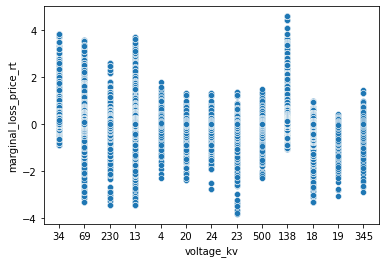

In [75]:
sns.scatterplot(solar['voltage_kv'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fuel_percentage_of_total', ylabel='marginal_loss_price_rt'>

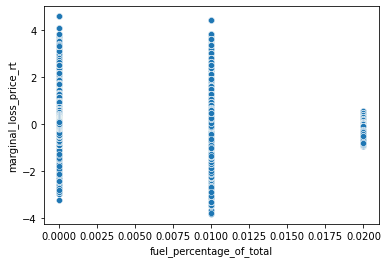

In [76]:
sns.scatterplot(solar['fuel_percentage_of_total'], solar['marginal_loss_price_rt'], data=solar)

C:\Users\Gabe\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mw', ylabel='marginal_loss_price_rt'>

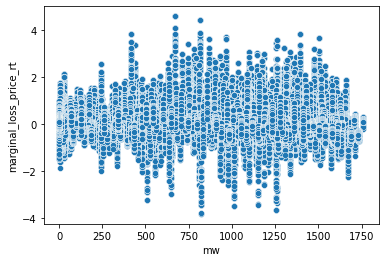

In [77]:
sns.scatterplot(solar['mw'], solar['marginal_loss_price_rt'], data=solar)

In [78]:
sns.set(rc={'figure.figsize':(11, 4)})

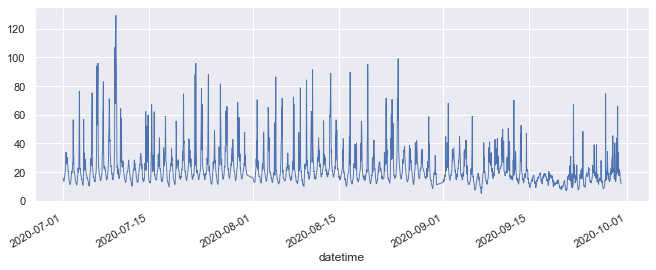

In [80]:
solar['system_energy_price_rt'].plot(linewidth=0.9);

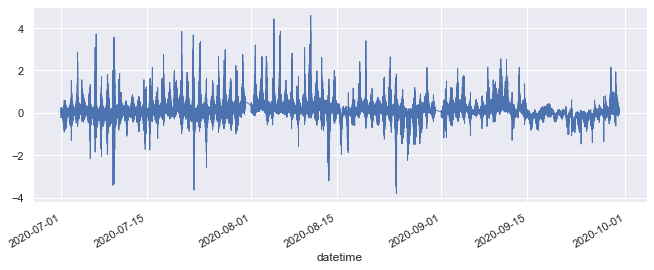

In [82]:
solar['marginal_loss_price_rt'].plot(linewidth=0.9);

## General trend seems to be neither multiplicative nor additive.

Checking for seasonality.

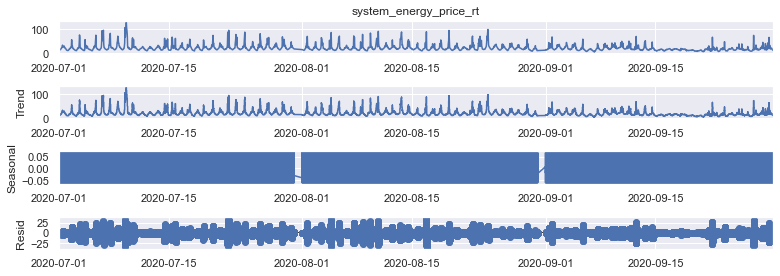

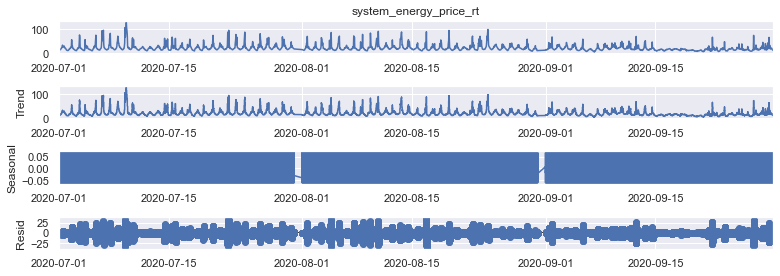

In [98]:


sys_enrg_price = solar['system_energy_price_rt']
mar_loss_price = solar[['marginal_loss_price_rt']]
# Plot the original data, the trend, the seasonality, and the residuals 

from statsmodels.tsa.seasonal import seasonal_decompose
sys_dec=seasonal_decompose(sys_enrg_price, period=92)
sys_dec.plot()


In [93]:
len(pd.Series(sys_enrg_price.index).map(pd.Timestamp.date).unique())

92

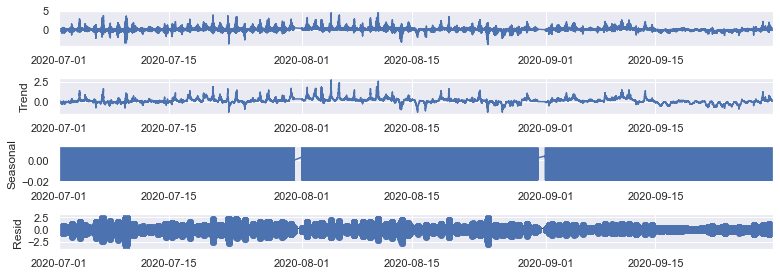

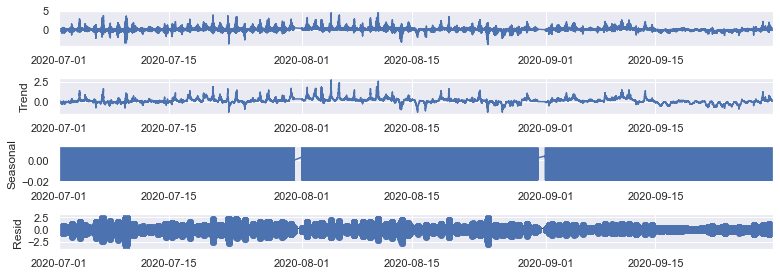

In [99]:
loss_dec=seasonal_decompose(mar_loss_price, period=92)
loss_dec.plot()

In [109]:
#zoom into a month
wind_perc_july = wind.loc['2020-07','fuel_percentage_of_total']
wind_perc_aug = wind.loc['2020-08','fuel_percentage_of_total']
wind_perc_sept = wind.loc['2020-09','fuel_percentage_of_total']
wind_perc_july_mean = wind_perc_july.mean()
wind_perc_aug_mean = wind_perc_aug.mean()
wind_perc_sept_mean = wind_perc_sept.mean()

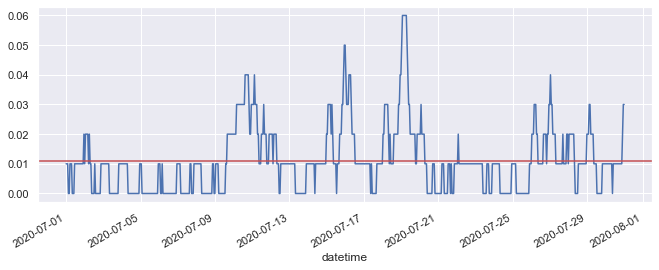

In [110]:
wind_perc_july.plot()
plt.axhline(y=wind_perc_july_mean, color='r', linestyle='-')

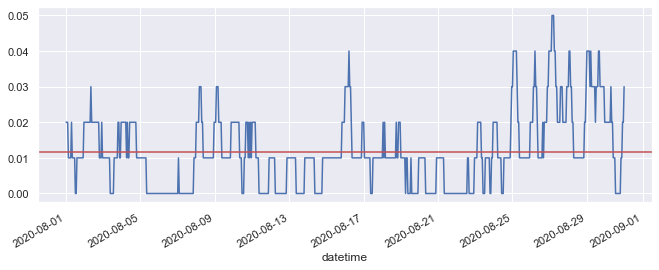

In [111]:
wind_perc_aug.plot()
plt.axhline(y=wind_perc_aug_mean, color='r', linestyle='-')

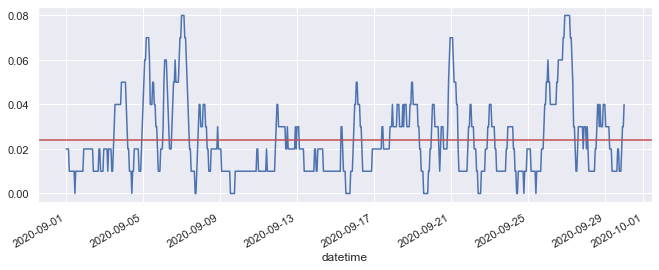

In [112]:
wind_perc_sept.plot()
plt.axhline(y=wind_perc_sept_mean, color='r', linestyle='-')

## It appears that the wind % avg was slowly creeping up over the 3-month timeframe. Perhaps around 1.3%. Significance?

Now we'll do same for Solar

In [114]:
solar_perc_july = solar.loc['2020-07','fuel_percentage_of_total']
solar_perc_aug = solar.loc['2020-08','fuel_percentage_of_total']
solar_perc_sept = solar.loc['2020-09','fuel_percentage_of_total']
solar_perc_july_mean = solar_perc_july.mean()
solar_perc_aug_mean = solar_perc_aug.mean()
solar_perc_sept_mean = solar_perc_sept.mean()

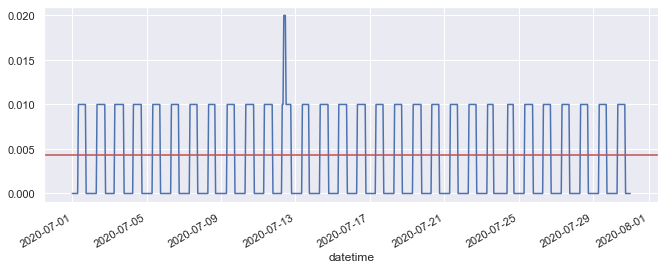

In [118]:
solar_perc_july.plot()
plt.axhline(y=solar_perc_july_mean, color='r', linestyle='-')

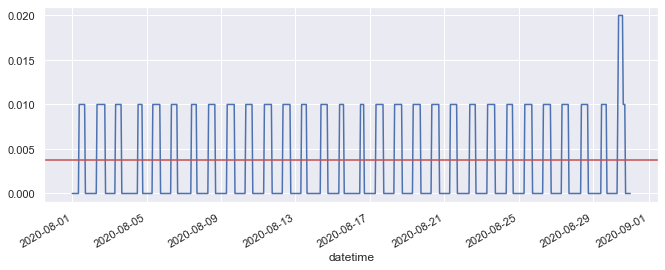

In [119]:
solar_perc_aug.plot()
plt.axhline(y=solar_perc_aug_mean, color='r', linestyle='-')

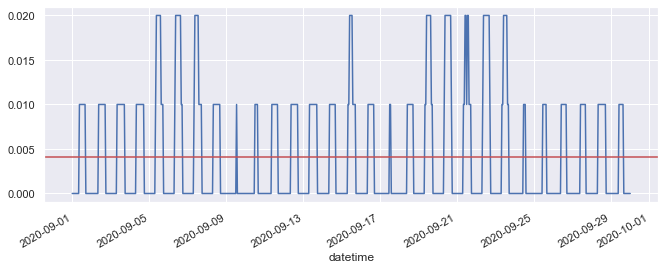

In [120]:
solar_perc_sept.plot()
plt.axhline(y=solar_perc_sept_mean, color='r', linestyle='-')

<AxesSubplot:xlabel='datetime'>

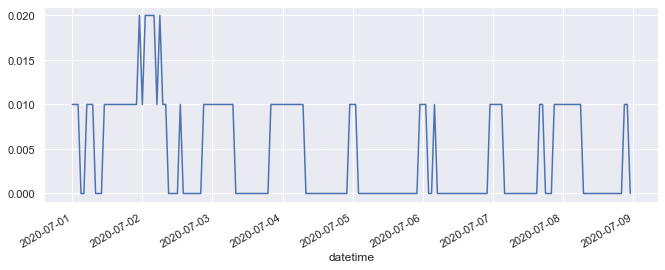

In [121]:
wind.loc['2020-07-01':'2020-07-08', 'fuel_percentage_of_total'].plot()

## clear signs of seasonality that corresponds with the difference of night and day

## Feature engineering 

In [124]:
import featuretools as ft

# Useful for showing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import featuretools.variable_types as vtypes

# Make empty entityset
es = ft.EntitySet(id = 'pepco_solar')

In [125]:
solar.dtypes
solar.

pnode_id                      int64
pnode_name                   object
voltage_kv                   object
equipment                    object
type                         object
system_energy_price_rt      float64
total_lmp_rt                float64
congestion_price_rt         float64
marginal_loss_price_rt      float64
row_is_current                 bool
version_nbr                   int64
solar_generation_mw         float64
fuel_type                    object
mw                          float64
fuel_percentage_of_total    float64
is_renewable                   bool
dtype: object

In [130]:
#only three so we can easily do dummy
solar.type.value_counts()

LOAD    352569
GEN     105987
EHV       8652
Name: type, dtype: int64

In [134]:

solar.voltage_kv.value_counts()

for x in solar.voltage_kv

69     183855
13      95172
138     90846
34      34608
18      19467
230     12978
500      8652
23       4326
4        4326
24       4326
20       4326
19       2163
345      2163
Name: voltage_kv, dtype: int64

In [136]:
for x in solar.voltage_kv:
    low_kv = [4, 13]
    mid_kv = [18, 19, 20, 23, 24]
    upper_kv = [230, 345]
    if solar.voltage_kv[x] in low_kv:
        solar[low_kv] = 1
    elif solar.voltage_kv[x] in mid_kv:
        solar[mid_kv] = 1
    elif solar.voltage_kv[x] in upper_kv:
        solar[upper_kv] = 1
    else:
        pass

KeyError: '34'

In [135]:
#216 pnodes 

solar.pnode_id.value_counts()

2156108941    2163
49744         2163
49738         2163
49737         2163
49736         2163
              ... 
1388599594    2163
1388599595    2163
50823         2163
50822         2163
1318144041    2163
Name: pnode_id, Length: 216, dtype: int64

# Create Mask

In [ ]:
mask = df["country"].isin(counts[counts < 5].index)